In [3]:
# wine dataset으로 레드/화이트 와인 분류 모델 작성
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from keras.models import Sequential
from keras.layers import Dense, Input, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split


In [4]:
wdf = pd.read_csv('https://raw.githubusercontent.com/pykwon/python/refs/heads/master/testdata_utf8/wine.csv',header=None)
# print(wdf.head())
# wdf.info()
# print(wdf.iloc[:,12].unique()) # [1 0], 1 - red, 0 - white
print(len(wdf[wdf.iloc[:,12] == 0])) # 4898
print(len(wdf[wdf.iloc[:,12] == 1])) # 1599

# array
dataset = wdf.values
x = dataset[:, 0:12] # feature
y = dataset[:, -1] # label

np.set_printoptions(suppress=True) # 과학적 표기법 안하기
print(x[:3])
print(y[:3])

# train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12, shuffle=True, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# (4547, 12) (1950, 12) (4547,) (1950,)

4898
1599
[[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
   0.56    9.4     5.    ]
 [ 7.8     0.88    0.      2.6     0.098  25.     67.      0.9968  3.2
   0.68    9.8     5.    ]
 [ 7.8     0.76    0.04    2.3     0.092  15.     54.      0.997   3.26
   0.65    9.8     5.    ]]
[1. 1. 1.]
(4547, 12) (1950, 12) (4547,) (1950,)


In [5]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2)) # 과적합 방지 : 20% 확률로 뉴런을 끈다
model.add(BatchNormalization()) # 배치 정규화, 역전파시 기울기 소실 또는 폭주 방지, cnn 등에서 특히 효과적
model.add(Dense(16, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# print(model.summary())
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit() 전에 model score 확인
loss, acc = model.evaluate(x_train, y_train, verbose=0)

print(f'훈련 전 모델 정확도 : {100*acc:5.2f}%')

2025-09-15 18:15:11.773395: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-15 18:15:11.773565: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-15 18:15:11.773584: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-15 18:15:11.773756: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-15 18:15:11.773771: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-09-15 18:15:12.256133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


훈련 전 모델 정확도 : 75.39%


In [6]:
# 모델 저장 폴더 설정 model checkpoint
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = 'model/{epoch:02d}_{val_loss:.4f}.keras'
# modelpath = 'abc.keras'

# 모델 학습과정에서 특정 기준에 따라 자동으로 모델을 저장하는 callback
chkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', mode='auto', save_best_only=True) # min : loss, max : accuracy, auto


# 조기 종료
early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, validation_split=0.2, epochs=1000, batch_size=64, callbacks=[early_stop, chkpoint], verbose=2)

loss, acc = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print(f'훈련 후 모델 정확도 : {100*acc:5.2f}%')

Epoch 1/1000
57/57 - 4s - 66ms/step - accuracy: 0.7292 - loss: 0.5486 - val_accuracy: 0.8747 - val_loss: 0.2960
Epoch 2/1000
57/57 - 1s - 14ms/step - accuracy: 0.8257 - loss: 0.3698 - val_accuracy: 0.9341 - val_loss: 0.1969
Epoch 3/1000
57/57 - 1s - 14ms/step - accuracy: 0.8743 - loss: 0.2927 - val_accuracy: 0.9396 - val_loss: 0.1870
Epoch 4/1000
57/57 - 1s - 13ms/step - accuracy: 0.8903 - loss: 0.2748 - val_accuracy: 0.9352 - val_loss: 0.1889
Epoch 5/1000
57/57 - 1s - 13ms/step - accuracy: 0.8930 - loss: 0.2594 - val_accuracy: 0.9308 - val_loss: 0.1893
Epoch 6/1000
57/57 - 1s - 13ms/step - accuracy: 0.9057 - loss: 0.2448 - val_accuracy: 0.9242 - val_loss: 0.2077
Epoch 7/1000
57/57 - 1s - 13ms/step - accuracy: 0.9139 - loss: 0.2305 - val_accuracy: 0.9066 - val_loss: 0.2322
Epoch 8/1000
57/57 - 1s - 13ms/step - accuracy: 0.9222 - loss: 0.2228 - val_accuracy: 0.9066 - val_loss: 0.2369
훈련 후 모델 정확도 : 91.23%


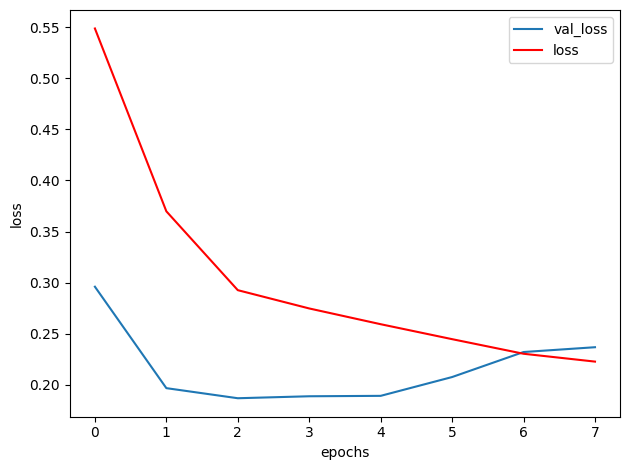

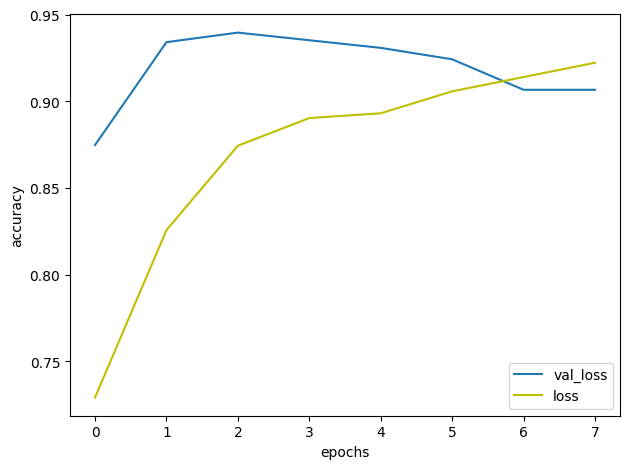

In [7]:
# 시각화
epoch_len = np.arange(len(history.epoch))

plt.plot(epoch_len, history.history['val_loss'], label='val_loss')
plt.plot(epoch_len, history.history['loss'], label='loss', color='r')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(epoch_len, history.history['val_accuracy'], label='val_loss')
plt.plot(epoch_len, history.history['accuracy'], label='loss', color='y')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Best Model로 예측
from keras.models import load_model
model = load_model(MODEL_DIR + '29_0.0964.keras')

new_data = x_test[:15, :]
# print(new_data)
pred = model.predict(new_data)
print(f'예측 결과 : {np.where(pred >= 0.5, 1, 0).ravel()}')
print(f'실제 결과 : {y_test[:15].ravel()}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
예측 결과 : [1 0 1 0 0 1 1 0 0 0 0 0 0 0 1]
실제 결과 : [1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.]


ValueError: Classification metrics can't handle a mix of binary and continuous targets